In [1]:
import pandas as pd
import numpy as np

In [2]:
filename = 'shopee.csv'
exportname = 'shopee_trans.csv'

In [3]:
df = pd.read_csv(filename).T
df_month = pd.DataFrame(df[5:][0])
df_month.columns = ['Visit']
df_month.head()

,Visit
2016-12,80559
2017-01,80559
2017-02,80559
2017-03,86791
2017-04,84268


In [4]:
df_use = df_month
df_use.index = pd.to_datetime(df_use.index, format='%Y-%m')
df_use.head()

,Visit
2016-12-01,80559
2017-01-01,80559
2017-02-01,80559
2017-03-01,86791
2017-04-01,84268


In [5]:
df_use['Visit per day'] = df_use['Visit'] / df_use.index.days_in_month
df_use.head()

,Visit,Visit per day
2016-12-01,80559,2598.677419
2017-01-01,80559,2598.677419
2017-02-01,80559,2877.107143
2017-03-01,86791,2799.709677
2017-04-01,84268,2808.933333


In [6]:
df_use.loc[pd.Timestamp("2021-10-01"), 'Visit'] = 0
df_use.head()

,Visit,Visit per day
2016-12-01,80559,2598.677419
2017-01-01,80559,2598.677419
2017-02-01,80559,2877.107143
2017-03-01,86791,2799.709677
2017-04-01,84268,2808.933333


In [7]:
df_use.index

DatetimeIndex(['2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01',
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01',
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01',
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
               '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01',
               '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
      

In [8]:
df_use = df_use.resample('D', convention='end').asfreq()
df_use

,Visit,Visit per day
2016-12-01,80559,2598.677419
2016-12-02,NaN,NaN
2016-12-03,NaN,NaN
2016-12-04,NaN,NaN
2016-12-05,NaN,NaN
...,...,...
2021-09-27,NaN,NaN
2021-09-28,NaN,NaN
2021-09-29,NaN,NaN
2021-09-30,NaN,NaN


In [9]:
df_use['Visit'] = df_use['Visit'].astype(float)
df_use['Visit per day'] = df_use['Visit per day'].astype(float)
df_use.describe()

,Visit,Visit per day
count,5.900000e+01,5.800000e+01
mean,1.091288e+07,3.650210e+05
std,1.280995e+07,4.224214e+05
min,0.000000e+00,2.598677e+03
25%,1.118366e+06,3.879131e+04
50%,3.543966e+06,1.211920e+05
75%,2.550426e+07,8.558087e+05
max,3.604460e+07,1.201487e+06


In [10]:
df_inter_time = df_use.interpolate(method='time')
df_inter_time

,Visit,Visit per day
2016-12-01,80559.0,2.598677e+03
2016-12-02,80559.0,2.598677e+03
2016-12-03,80559.0,2.598677e+03
2016-12-04,80559.0,2.598677e+03
2016-12-05,80559.0,2.598677e+03
...,...,...
2021-09-27,4616737.2,1.154184e+06
2021-09-28,3462552.9,1.154184e+06
2021-09-29,2308368.6,1.154184e+06
2021-09-30,1154184.3,1.154184e+06


<AxesSubplot:>

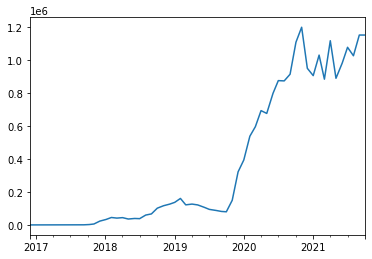

In [11]:
df_inter_time['Visit per day'].plot()

In [12]:
day = df_inter_time.index.day
month = df_inter_time.index.month
day_sub = 15 ** 2 - (15 - day) ** 2
day_sub

Int64Index([ 29,  56,  81, 104, 125, 144, 161, 176, 189, 200,
            ...
            176, 161, 144, 125, 104,  81,  56,  29,   0,  29],
           dtype='int64', length=1766)

In [13]:
day_of_week = df_inter_time.index.day_of_week.values

In [14]:
buy_dow = {
    0: 14,
    1: 14,
    2: 15,
    3: 15,
    4: 15,
    5: 13,
    6: 14
}

In [15]:
dow_bonus = np.vectorize(buy_dow.get)(day_of_week)
dow_bonus

array([15, 15, 13, ..., 15, 15, 15])

In [16]:
# Adding noise
noise = 100 + np.random.randn(df_use.shape[0]) * 10 + (day_sub / 20) + (month == day) * 15 + (month == day + 1) * 7 + (month == day - 1) * 3 + dow_bonus * 1.5
noise

Float64Index([136.91633656076704, 113.89424974129383, 126.35123277732048,
              123.14060249263596,  133.3848827515301, 139.39459180477215,
              132.42406335917326, 142.20662570597696, 139.10019351795086,
              112.04126303155356,
              ...
              122.84320296843497, 126.08773668796316,  143.0953830733785,
              143.37160449530978, 125.21985226582365, 137.60236293746652,
              123.40671543261246, 119.87230271674785, 122.87820006844433,
               111.8821207362728],
             dtype='float64', length=1766)

<AxesSubplot:>

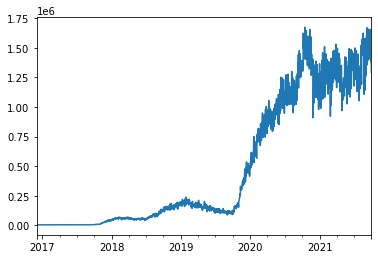

In [17]:
df_noise = df_inter_time['Visit per day'] * noise / 100
df_noise.plot()

In [18]:
df_noise.resample('M').sum()[:-1]

2016-12-31    1.055097e+05
2017-01-31    1.082110e+05
2017-02-28    1.041647e+05
2017-03-31    1.120025e+05
2017-04-30    1.142901e+05
2017-05-31    1.251984e+05
2017-06-30    1.180779e+05
2017-07-31    1.178742e+05
2017-08-31    1.201900e+05
2017-09-30    1.344787e+05
2017-10-31    2.291348e+05
2017-11-30    6.220380e+05
2017-12-31    1.175956e+06
2018-01-31    1.663428e+06
2018-02-28    1.640762e+06
2018-03-31    1.831802e+06
2018-04-30    1.659893e+06
2018-05-31    1.595291e+06
2018-06-30    1.618097e+06
2018-07-31    1.990123e+06
2018-08-31    2.611896e+06
2018-09-30    3.322882e+06
2018-10-31    4.449580e+06
2018-11-30    4.665561e+06
2018-12-31    5.392757e+06
2019-01-31    5.907668e+06
2019-02-28    5.321596e+06
2019-03-31    5.161083e+06
2019-04-30    4.800475e+06
2019-05-31    4.730733e+06
2019-06-30    4.094109e+06
2019-07-31    3.801627e+06
2019-08-31    3.556456e+06
2019-09-30    3.219123e+06
2019-10-31    4.619492e+06
2019-11-30    9.075123e+06
2019-12-31    1.436204e+07
2

In [19]:
df_month['Visit'].astype(float).to_numpy()

array([   80559.,    80559.,    80559.,    86791.,    84268.,    93145.,
          96431.,    90914.,    89978.,    88623.,   122889.,   229134.,
         778813.,  1052495.,  1336555.,  1355522.,  1411203.,  1184238.,
        1257409.,  1257409.,  1925134.,  2079085.,  3212275.,  3543966.,
        3923365.,  4299095.,  4568203.,  3851804.,  3877060.,  3865238.,
        3366691.,  3014369.,  2853478.,  2540620.,  2548624.,  4558840.,
        9985486., 12286062., 15618169., 18447276., 20874283., 21042111.,
       23850149., 27211828., 27158374., 27492462., 34337007., 36044596.,
       29523400., 28151025., 28910534., 27481597., 33593113., 27649275.,
       29331919., 33475655., 31885021., 34625529.,        0.])

In [20]:
df_noise.resample('M').sum().to_numpy()

array([  105509.68006882,   108211.00258174,   104164.65338504,
         112002.53259594,   114290.12496894,   125198.43120993,
         118077.91363962,   117874.16238986,   120190.03239024,
         134478.69566107,   229134.8258557 ,   622038.00726764,
        1175956.23519746,  1663428.24285459,  1640762.1608927 ,
        1831802.34736713,  1659892.67565393,  1595291.20605273,
        1618096.54836418,  1990122.93004427,  2611895.85833234,
        3322882.14123725,  4449579.66630437,  4665561.24993128,
        5392757.43132138,  5907667.8214312 ,  5321595.9760555 ,
        5161083.42414125,  4800475.12879091,  4730732.74876568,
        4094109.38280938,  3801627.26994792,  3556456.16182272,
        3219122.91292236,  4619491.63656376,  9075122.9939987 ,
       14362040.0133856 , 18308644.32435822, 21407749.24535789,
       26010731.91223167, 27197580.94075187, 29686219.12088413,
       32093929.48670891, 35111152.5264627 , 35181899.19524914,
       38864394.8592813 , 45933306.33439

In [21]:
df_month['proportion'] = df_month['Visit'].astype(float).to_numpy() / df_noise.resample('M').sum().to_numpy()
df_month

,Visit,Visit per day,proportion
2016-12-01,80559,2598.677419,0.763522
2017-01-01,80559,2598.677419,0.744462
2017-02-01,80559,2877.107143,0.773381
2017-03-01,86791,2799.709677,0.774902
2017-04-01,84268,2808.933333,0.737317
2017-05-01,93145,3004.677419,0.743979
2017-06-01,96431,3214.366667,0.816673
2017-07-01,90914,2932.709677,0.771280
2017-08-01,89978,2902.516129,0.748631
2017-09-01,88623,2954.1,0.659011


In [22]:
df_normal = (df_noise * df_month.resample('D', convention='end').asfreq()['proportion'].fillna(method='ffill')).astype(int)

<AxesSubplot:>

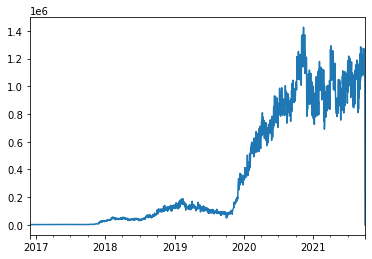

In [23]:
df_normal.plot()

In [24]:
df_normal[:-1].to_csv(exportname, header=['Visited'])